First attempt at image segmentation using color space segmentation.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

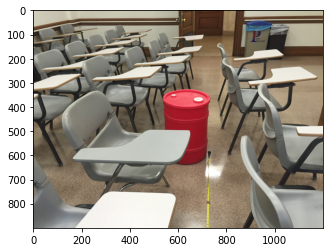

In [52]:
# loading in an image of a barrel.
barrel2_3 = cv2.imread('barrel-pics/2.3.png')
barrel2_3 = cv2.cvtColor(barrel2_3,cv2.COLOR_BGR2RGB)
plt.imshow(barrel2_3)

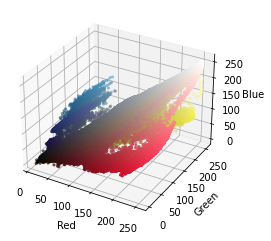

In [53]:
r, g, b = cv2.split(barrel2_3)
fig = plt.figure()
axis = fig.add_subplot(1,1,1, projection = "3d")
pixel_colors = barrel2_3.reshape((np.shape(barrel2_3)[0]*np.shape(barrel2_3)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [54]:
# creating a dark and light red colour limit for segmentation
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

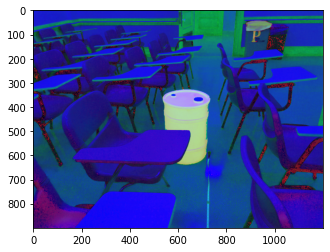

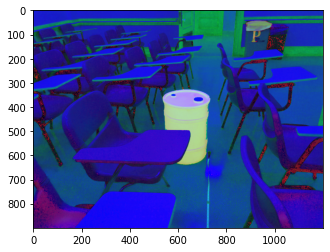

In [56]:
hsv_barrel = cv2.cvtColor(barrel2_3, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_barrel)


mask = cv2.inRange(hsv_barrel, light_orange, dark_orange)
result = cv2.bitwise_and(barrel2_3, barrel2_3, mask=mask)

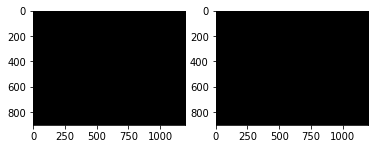

In [57]:
plt.subplot(1,2,1)
plt.imshow(mask, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()
